In [1]:
import argparse
import os
import pickle
import sys
import cv2
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt

from tqdm import tqdm
import glob
import copy
import argparse

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import sys
sys.path.append('../')
sys.path.append('../../src')

from utils import *

In [2]:
from benji_prox_dataloader import *
from visualisation import *
import tqdm
from simple_transformer import PoseTransformer
import torch
from torch import nn

root_dir = "/cluster/scratch/bdayan/prox_data/"
smplx_model_path='/cluster/home/bdayan/prox/prox/models_smplx_v1_1/models/'

in_frames = 15
pred_frames = 45
frame_jump=10


body_model = get_smplx_body_model(smplx_model_path)
pdp = proxDatasetProximityMap(root_dir + 'PROXD', root_dir + 'recordings', root_dir + 'calibration', smplx_model_path = smplx_model_path,\
                              in_frames=in_frames, pred_frames=pred_frames, frame_jump=frame_jump)


numpy: 1.22.3
sequence has insufficient frames for one training input
sequence has insufficient frames for one training input


In [5]:
pdp.depthDataset.bounds
pdp.skelDataset.bounds

array([  3,   4,   8,  12,  13,  23,  29,  31,  33,  37,  42,  47,  51,
        56,  58,  61,  67,  70,  73,  75,  78,  84,  89,  95,  98,  99,
       105, 108, 117, 122, 127, 127, 135, 139, 144, 147, 150, 152, 158,
       164, 173, 179, 183, 190, 199, 201, 204, 205, 211, 214, 215, 217,
       223, 227, 229, 233, 239, 246, 250, 255])

array([  3,   4,   7,   8,  18,  23,  25,  27,  31,  36,  40,  45,  47,
        50,  56,  59,  62,  64,  67,  73,  79,  82,  83,  88,  90,  99,
       104, 109, 109, 113, 118, 121, 124, 126, 132, 138, 147, 153, 157,
       164, 173, 175, 178, 179, 185, 188, 189, 191, 194, 196, 200, 206,
       212, 216])

In [19]:
in_prox_maps, pred_prox_maps = pdp.__getitem__(3)

In [20]:
os.makedirs('prox_maps', exist_ok=True)
for i, img in enumerate(in_prox_maps + pred_prox_maps):
    # a colormap and a normalization instance
    cmap = plt.cm.jet
    norm = plt.Normalize(vmin=img.min(), vmax=img.max())

    # map the normalized data to colors
    # image is now RGBA (512x512x4) 
    image = cmap(norm(img))

    # save the image
    plt.imsave(f'prox_maps/img{i}.png', image)

In [16]:
img.min()

0.0021240206

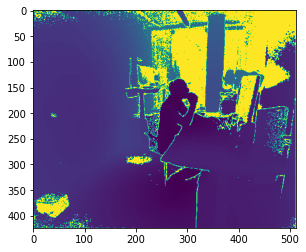

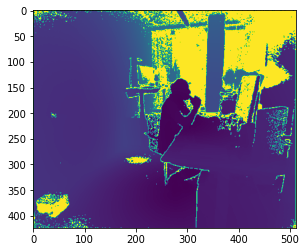

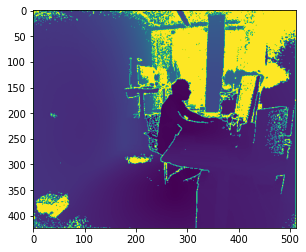

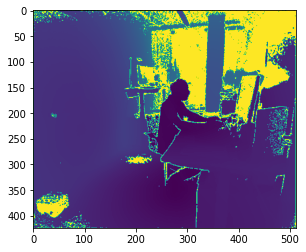

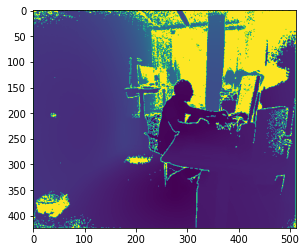

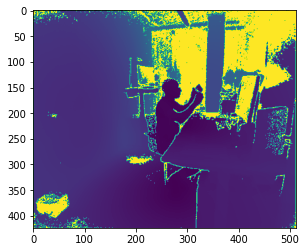

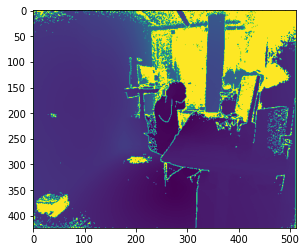

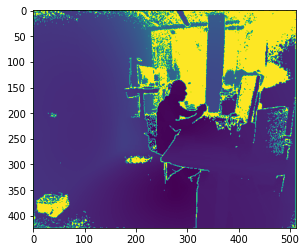

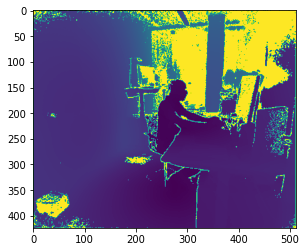

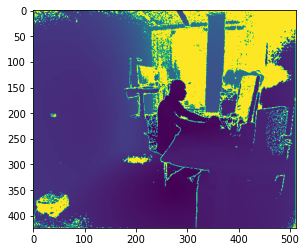

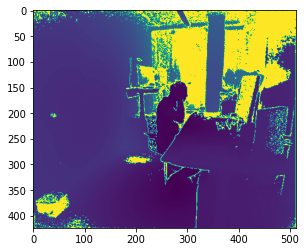

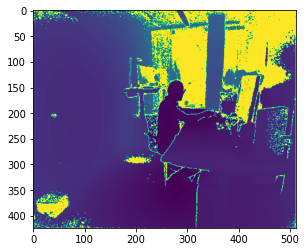

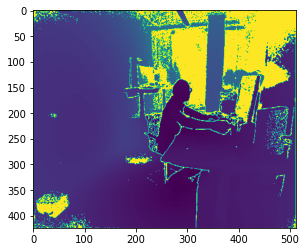

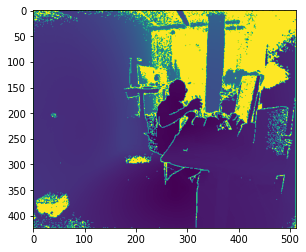

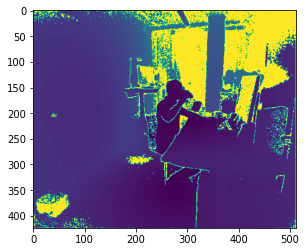

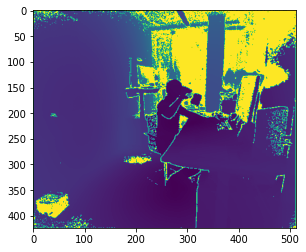

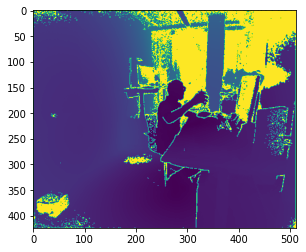

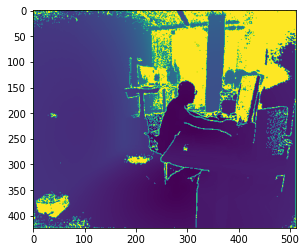

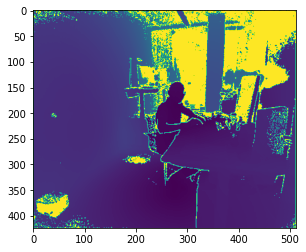

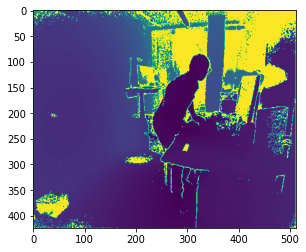

In [14]:
for img in (in_prox_maps + pred_prox_maps)[::3]:
    _ = plt.figure()
    _ = plt.imshow(img)

In [ ]:
os.makedirs('prox_maps', exist_ok=True)

In [10]:
len(pred_prox_maps)

5

In [7]:
for i, img in enumerate(torch.cat([in_prox_maps,pred_prox_maps])):
    print(i)
    print(img.shape)
    

TypeError: expected Tensor as element 0 in argument 0, but got list

In [4]:
# depth_imgs = frame_fns_to_images(pred_frames_fns)

# pdp.depth_and_skel_data_to_proximity_map(pred_frames_fns, pred_data)


NameError: name 'pred_frames_fns' is not defined

In [14]:
# in_frames_dicts, in_frames_fns, pred_frames_dicts, pred_frames_fns = pdp.depthDataset.__getitem__(100)
# (idx, (in_frames_fns_skel, in_data), (pred_frames_fns, pred_data)) = pdp.skelDataset.__getitem__(100)
# imgs = [cv2.imread(fn, flags=-1).astype(float) for fn in in_frames_fns]
# imgs2 = [cv2.imread(fn, flags=-1).astype(float) for fn in pred_frames_fns]

AttributeError: 'NoneType' object has no attribute 'astype'

In [3]:
# pcd, pcd_color_aligned, skeleton, body_bps_full = proximity_map(depth_img, skel_dict, body_model, pdp.proj.depth_cam, pdp.proj.color_cam)

NameError: name 'depth_img' is not defined

In [ ]:
# 


In [ ]:
# pd = proxDatasetSkeleton(root_dir=root_dir + '/PROXD', in_frames=in_frames, pred_frames=pred_frames, output_type='joint_locations', smplx_model_path=smplx_model_path)
# pdc = DatasetBase(root_dir=root_dir + '/recordings', in_frames=in_frames, pred_frames=pred_frames,
#                                              search_prefix='Color', extra_prefix='')
# pdd = DatasetBase(root_dir=root_dir + '/recordings', in_frames=in_frames, pred_frames=pred_frames,
#                                              search_prefix='Depth', extra_prefix='')

# print(len(pd), len(pdc), len(pdd))
# pd.align(pdc)
# pdc.align(pd)
# pd.align(pdd)
# pdd.align(pd)
# pdc.align(pdd)
# print(len(pd), len(pdc), len(pdd))

In [ ]:
# pd.output_type = 'joint_locations'
# idx, in_joint_locations, pred_joint_locations = pd.__getitem__(3000)
# pd.output_type = 'raw_pkls'
# (idx, (in_joint_fns, in_joint_data), (pred_joint_fns, pred_joint_data)) = pd.__getitem__(3000)
# in_frames_dicts, in_frames_fns, pred_frames_dicts, pred_frames_fns = pdc.__getitem__(3000)
# _, in_depth_fns, _, pred_depth_fns = pdd.__getitem__(3000)

# in_frames = [np.array(cv2.imread(fn)) for fn in in_frames_fns]
# in_depths = [np.array(cv2.imread(fn)) for fn in in_depth_fns]
# in_prox_maps = [proximity_map(depth_map, skeleton_dict, pd.body_model, pd.proj.depth_cam, 